
# Step 1: Define Research Questions


In [2]:
# Key Pollutants:Which pollutants (e.g., PM2.5, PM10, NO2, SO2, O3, CO) are most prevalent in Delhi's air quality data?

# Seasonal Variations:How does AQI change with seasons (winter, summer, monsoon, post-monsoon)?

# Geographical Impact:How do different areas in Delhi compare in terms of AQI?

# Correlation Analysis:What is the correlation between different pollutants?

# Trends and Patterns:What are the long-term trends in AQI data for Delhi?

# Step 2: Load and Explore the Data

In [3]:
import pandas as pd

In [11]:
delhi_aqi = pd.read_csv("delhiaqi.csv")

In [12]:
delhi_aqi

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19
...,...,...,...,...,...,...,...,...,...
556,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
557,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
558,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
559,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47


In [15]:
delhi_aqi.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [16]:
# Convert 'date' column to datetime format
delhi_aqi['date'] = pd.to_datetime(delhi_aqi['date'])


In [17]:
# Extract additional time-related features
delhi_aqi['year'] = delhi_aqi['date'].dt.year
delhi_aqi['month'] = delhi_aqi['date'].dt.month
delhi_aqi['day'] = delhi_aqi['date'].dt.day
delhi_aqi['hour'] = delhi_aqi['date'].dt.hour

In [18]:
# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

delhi_aqi['season'] = delhi_aqi['month'].apply(get_season)

In [19]:
delhi_aqi.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,year,month,day,hour,season
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,2023,1,1,0,Winter
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,2023,1,1,1,Winter
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,2023,1,1,2,Winter
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,2023,1,1,3,Winter
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,2023,1,1,4,Winter


In [20]:
missing_values = delhi_aqi.isnull().sum()
missing_values

date      0
co        0
no        0
no2       0
o3        0
so2       0
pm2_5     0
pm10      0
nh3       0
year      0
month     0
day       0
hour      0
season    0
dtype: int64

In [21]:
summary_statistics = delhi_aqi.describe()
summary_statistics

,co,no,no2,o3,so2,pm2_5,pm10,nh3,year,month,day,hour
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.0,561.0,561.000000,561.000000
mean,3814.942210,51.181979,75.292496,30.141943,64.655936,358.256364,420.988414,26.425062,2023.0,1.0,12.192513,11.379679
std,3227.744681,83.904476,42.473791,39.979405,61.073080,227.359117,271.287026,36.563094,0.0,0.0,6.756374,6.944696
min,654.220000,0.000000,13.370000,0.000000,5.250000,60.100000,69.080000,0.630000,2023.0,1.0,1.000000,0.000000
25%,1708.980000,3.380000,44.550000,0.070000,28.130000,204.450000,240.900000,8.230000,2023.0,1.0,6.000000,5.000000
50%,2590.180000,13.300000,63.750000,11.800000,47.210000,301.170000,340.900000,14.820000,2023.0,1.0,12.000000,11.000000
75%,4432.680000,59.010000,97.330000,47.210000,77.250000,416.650000,482.570000,26.350000,2023.0,1.0,18.000000,17.000000
max,16876.220000,425.580000,263.210000,164.510000,511.170000,1310.200000,1499.270000,267.510000,2023.0,1.0,24.000000,23.000000


# Step 3:Statistical Analyses and Visualizations

In [36]:
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt 

In [40]:
# Descriptive Statistics for Each Pollutant
descriptive_stats = delhi_aqi.describe()
print("Descriptive Statistics for Each Pollutant:")
print(descriptive_stats)

Descriptive Statistics for Each Pollutant:
                 co          no         no2          o3         so2  \
count    561.000000  561.000000  561.000000  561.000000  561.000000   
mean    3814.942210   51.181979   75.292496   30.141943   64.655936   
std     3227.744681   83.904476   42.473791   39.979405   61.073080   
min      654.220000    0.000000   13.370000    0.000000    5.250000   
25%     1708.980000    3.380000   44.550000    0.070000   28.130000   
50%     2590.180000   13.300000   63.750000   11.800000   47.210000   
75%     4432.680000   59.010000   97.330000   47.210000   77.250000   
max    16876.220000  425.580000  263.210000  164.510000  511.170000   

             pm2_5         pm10         nh3    year  month         day  \
count   561.000000   561.000000  561.000000   561.0  561.0  561.000000   
mean    358.256364   420.988414   26.425062  2023.0    1.0   12.192513   
std     227.359117   271.287026   36.563094     0.0    0.0    6.756374   
min      60.100000   

In [41]:
additional_stats = delhi_aqi[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']].agg(['mean', 'median', 'std', 'min', 'max'])
print("\nAdditional Statistics for Each Pollutant (Mean, Median, Std, Min, Max):")
print(additional_stats)


Additional Statistics for Each Pollutant (Mean, Median, Std, Min, Max):
                  co          no         no2          o3         so2  \
mean     3814.942210   51.181979   75.292496   30.141943   64.655936   
median   2590.180000   13.300000   63.750000   11.800000   47.210000   
std      3227.744681   83.904476   42.473791   39.979405   61.073080   
min       654.220000    0.000000   13.370000    0.000000    5.250000   
max     16876.220000  425.580000  263.210000  164.510000  511.170000   

              pm2_5         pm10         nh3  
mean     358.256364   420.988414   26.425062  
median   301.170000   340.900000   14.820000  
std      227.359117   271.287026   36.563094  
min       60.100000    69.080000    0.630000  
max     1310.200000  1499.270000  267.510000  


In [42]:
# Calculate range for each pollutant
range_stats = delhi_aqi[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']].max() - delhi_aqi[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']].min()
print("\nRange for Each Pollutant:")
print(range_stats)


Range for Each Pollutant:
co       16222.00
no         425.58
no2        249.84
o3         164.51
so2        505.92
pm2_5     1250.10
pm10      1430.19
nh3        266.88
dtype: float64


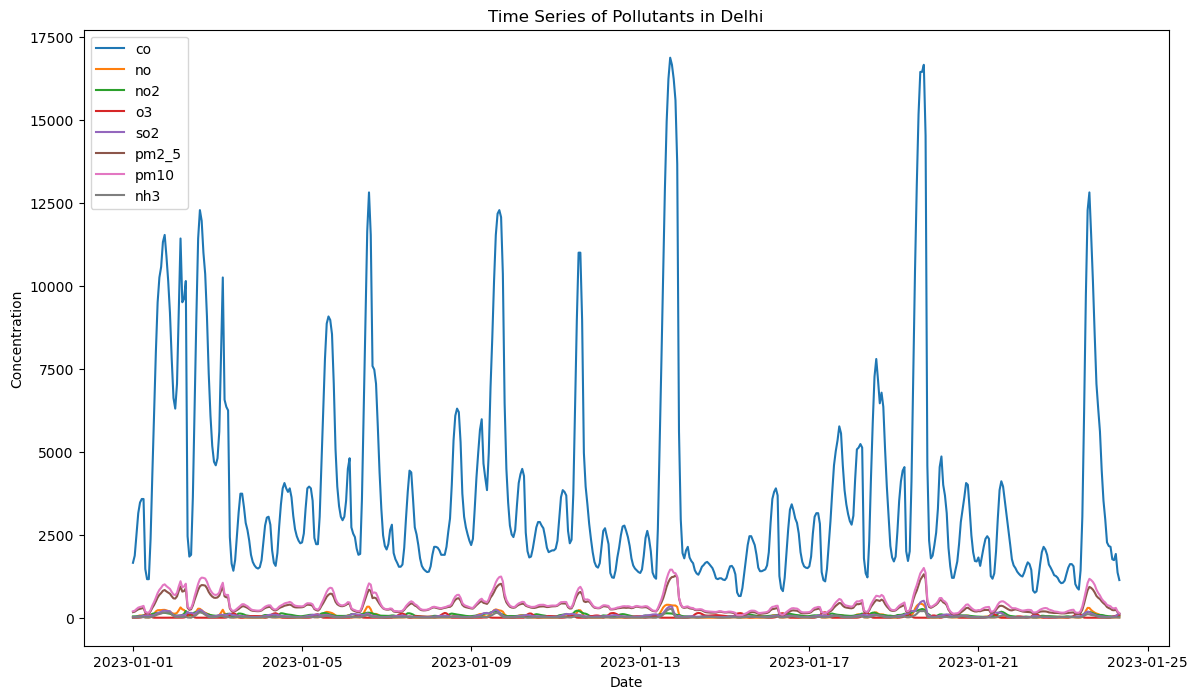

In [43]:
# Time Series Analysis
plt.figure(figsize=(14, 8))
for pollutant in ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']:
    plt.plot(delhi_aqi['date'], delhi_aqi[pollutant], label=pollutant)
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.title('Time Series of Pollutants in Delhi')
plt.legend()
plt.show()

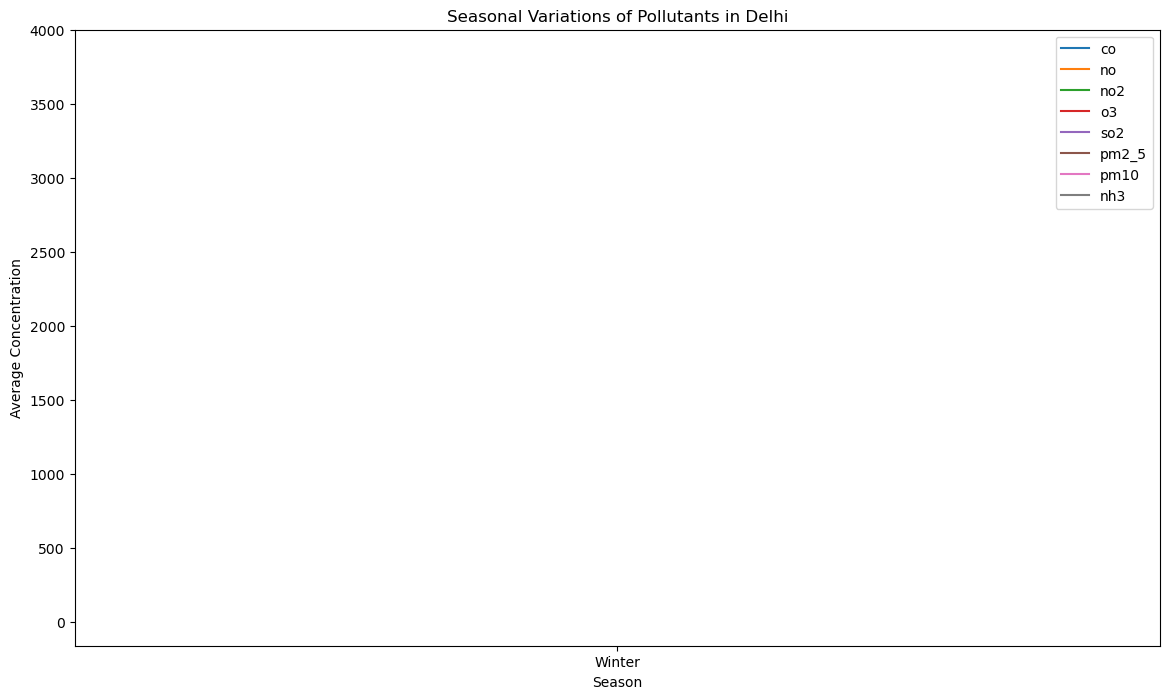

In [45]:
# Seasonal Variations
# Calculate seasonal average for numeric columns only
numeric_columns = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
seasonal_avg = delhi_aqi.groupby('season')[numeric_columns].mean()

# Ensure the seasonal data is in the correct order
season_order = ['Winter', 'Summer', 'Monsoon', 'Post-Monsoon']
seasonal_avg = seasonal_avg.reindex(season_order)

# Plot seasonal variations
plt.figure(figsize=(14, 8))
for pollutant in numeric_columns:
    plt.plot(seasonal_avg.index, seasonal_avg[pollutant], label=pollutant)
plt.xlabel('Season')
plt.ylabel('Average Concentration')
plt.title('Seasonal Variations of Pollutants in Delhi')
plt.legend()

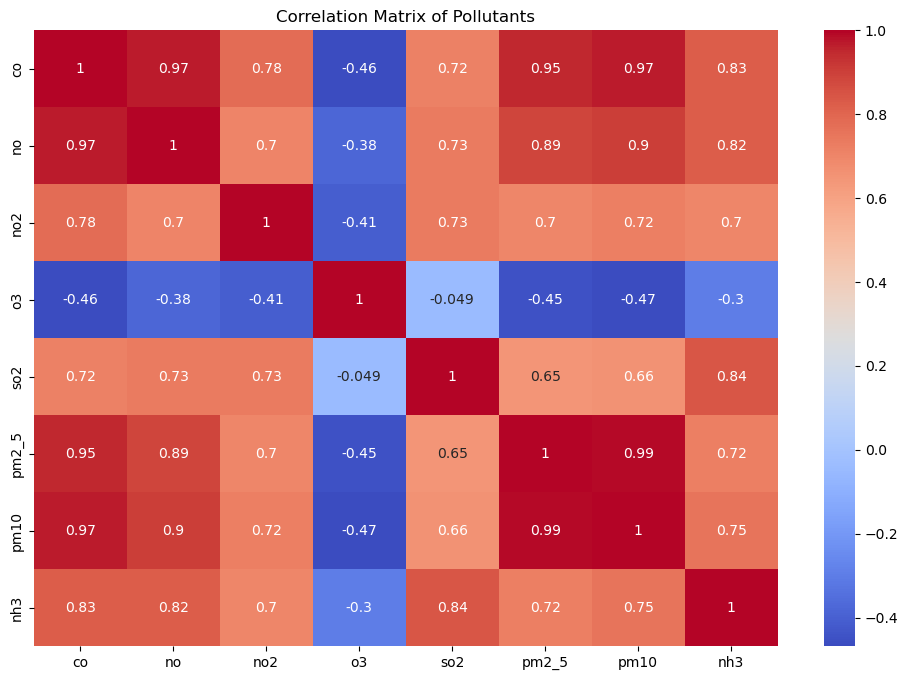

In [46]:
# Correlation Analysis
correlation_matrix = delhi_aqi[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Pollutants')
plt.show()


In [56]:
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

In [68]:
# Generate sample data (replace this with your own dataset)
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Standardize the features (if necessary)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=4, random_state=0)

In [71]:
# Fit the model to the data
kmeans.fit(X_scaled)


C:\Users\ASUS\ANA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\ANA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [72]:
labels = kmeans.labels_

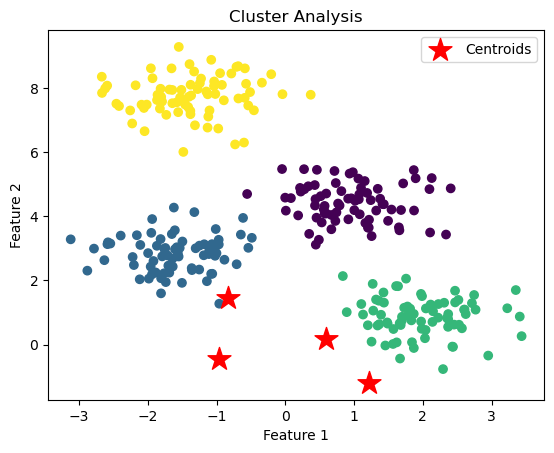

In [73]:
# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cluster Analysis')
plt.legend()
plt.show()
